# 2 Vetting TOI 1798.01
Whenever we find a new promising signal in `sherlock` we will have to carry a proper vetting of the data. This is the standard practice by the Science Processing Operations Center (SPOC) with their Data Validation (DV) Reports presented by Twicken et al. (2018) and Li et al. (2018) for the Kepler and TESS missions. In our case, we tried to replicate their DV checks with some oversimplifications. In the vetting execution, `sherlock` will check for 1) Odd-even transit shapes, 2) Transit SNR for the different available cadences, 3) Signal harmonic and subharmonic SNRs, 4) Transit source offset from TPFs (both with differential imaging and a `sherlock` new algorithm based on BLS phase folding of the TPF per-pixel data), 5) Centroids shift from centroids and motion data, 6) Single transits assessment.

To run the vetting for TOI 1798.01 (which we found in the 1st run), we would go to the `sherlock` search results directory `/TIC198153540_[16,_22,_23,_49,_50]` and execute:

`python3.8 -m sherlockpipe.vet --candidate 1`

The output of the vetting generated by `sherlock` consists on two PDF reports (a complete and a summary one) and a few csvs stored for reproducibility. In order to explore the resulting PDF page by page in this notebook we will need the `pdf2image` module.

In [1]:
! python3.8 -m pip install pdf2image

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.8 -m pip install --upgrade pip


Now that it is installed, let's begin with the report. We will load the summary PDF and convert it into a set of images (one image per page).

In [2]:
from pdf2image import convert_from_path
from IPython.display import Image
import os 

your_execution_dir = os.getcwd() 
# Store Pdf with convert_from_path function
images = convert_from_path(your_execution_dir + '/TIC198153540_[16,_22,_23,_49,_50]/vetting_0/TIC 198153540_transits_validation_report_summary.pdf')


Time to look into the first page, Table 3, which is the metrics alerts grid. 

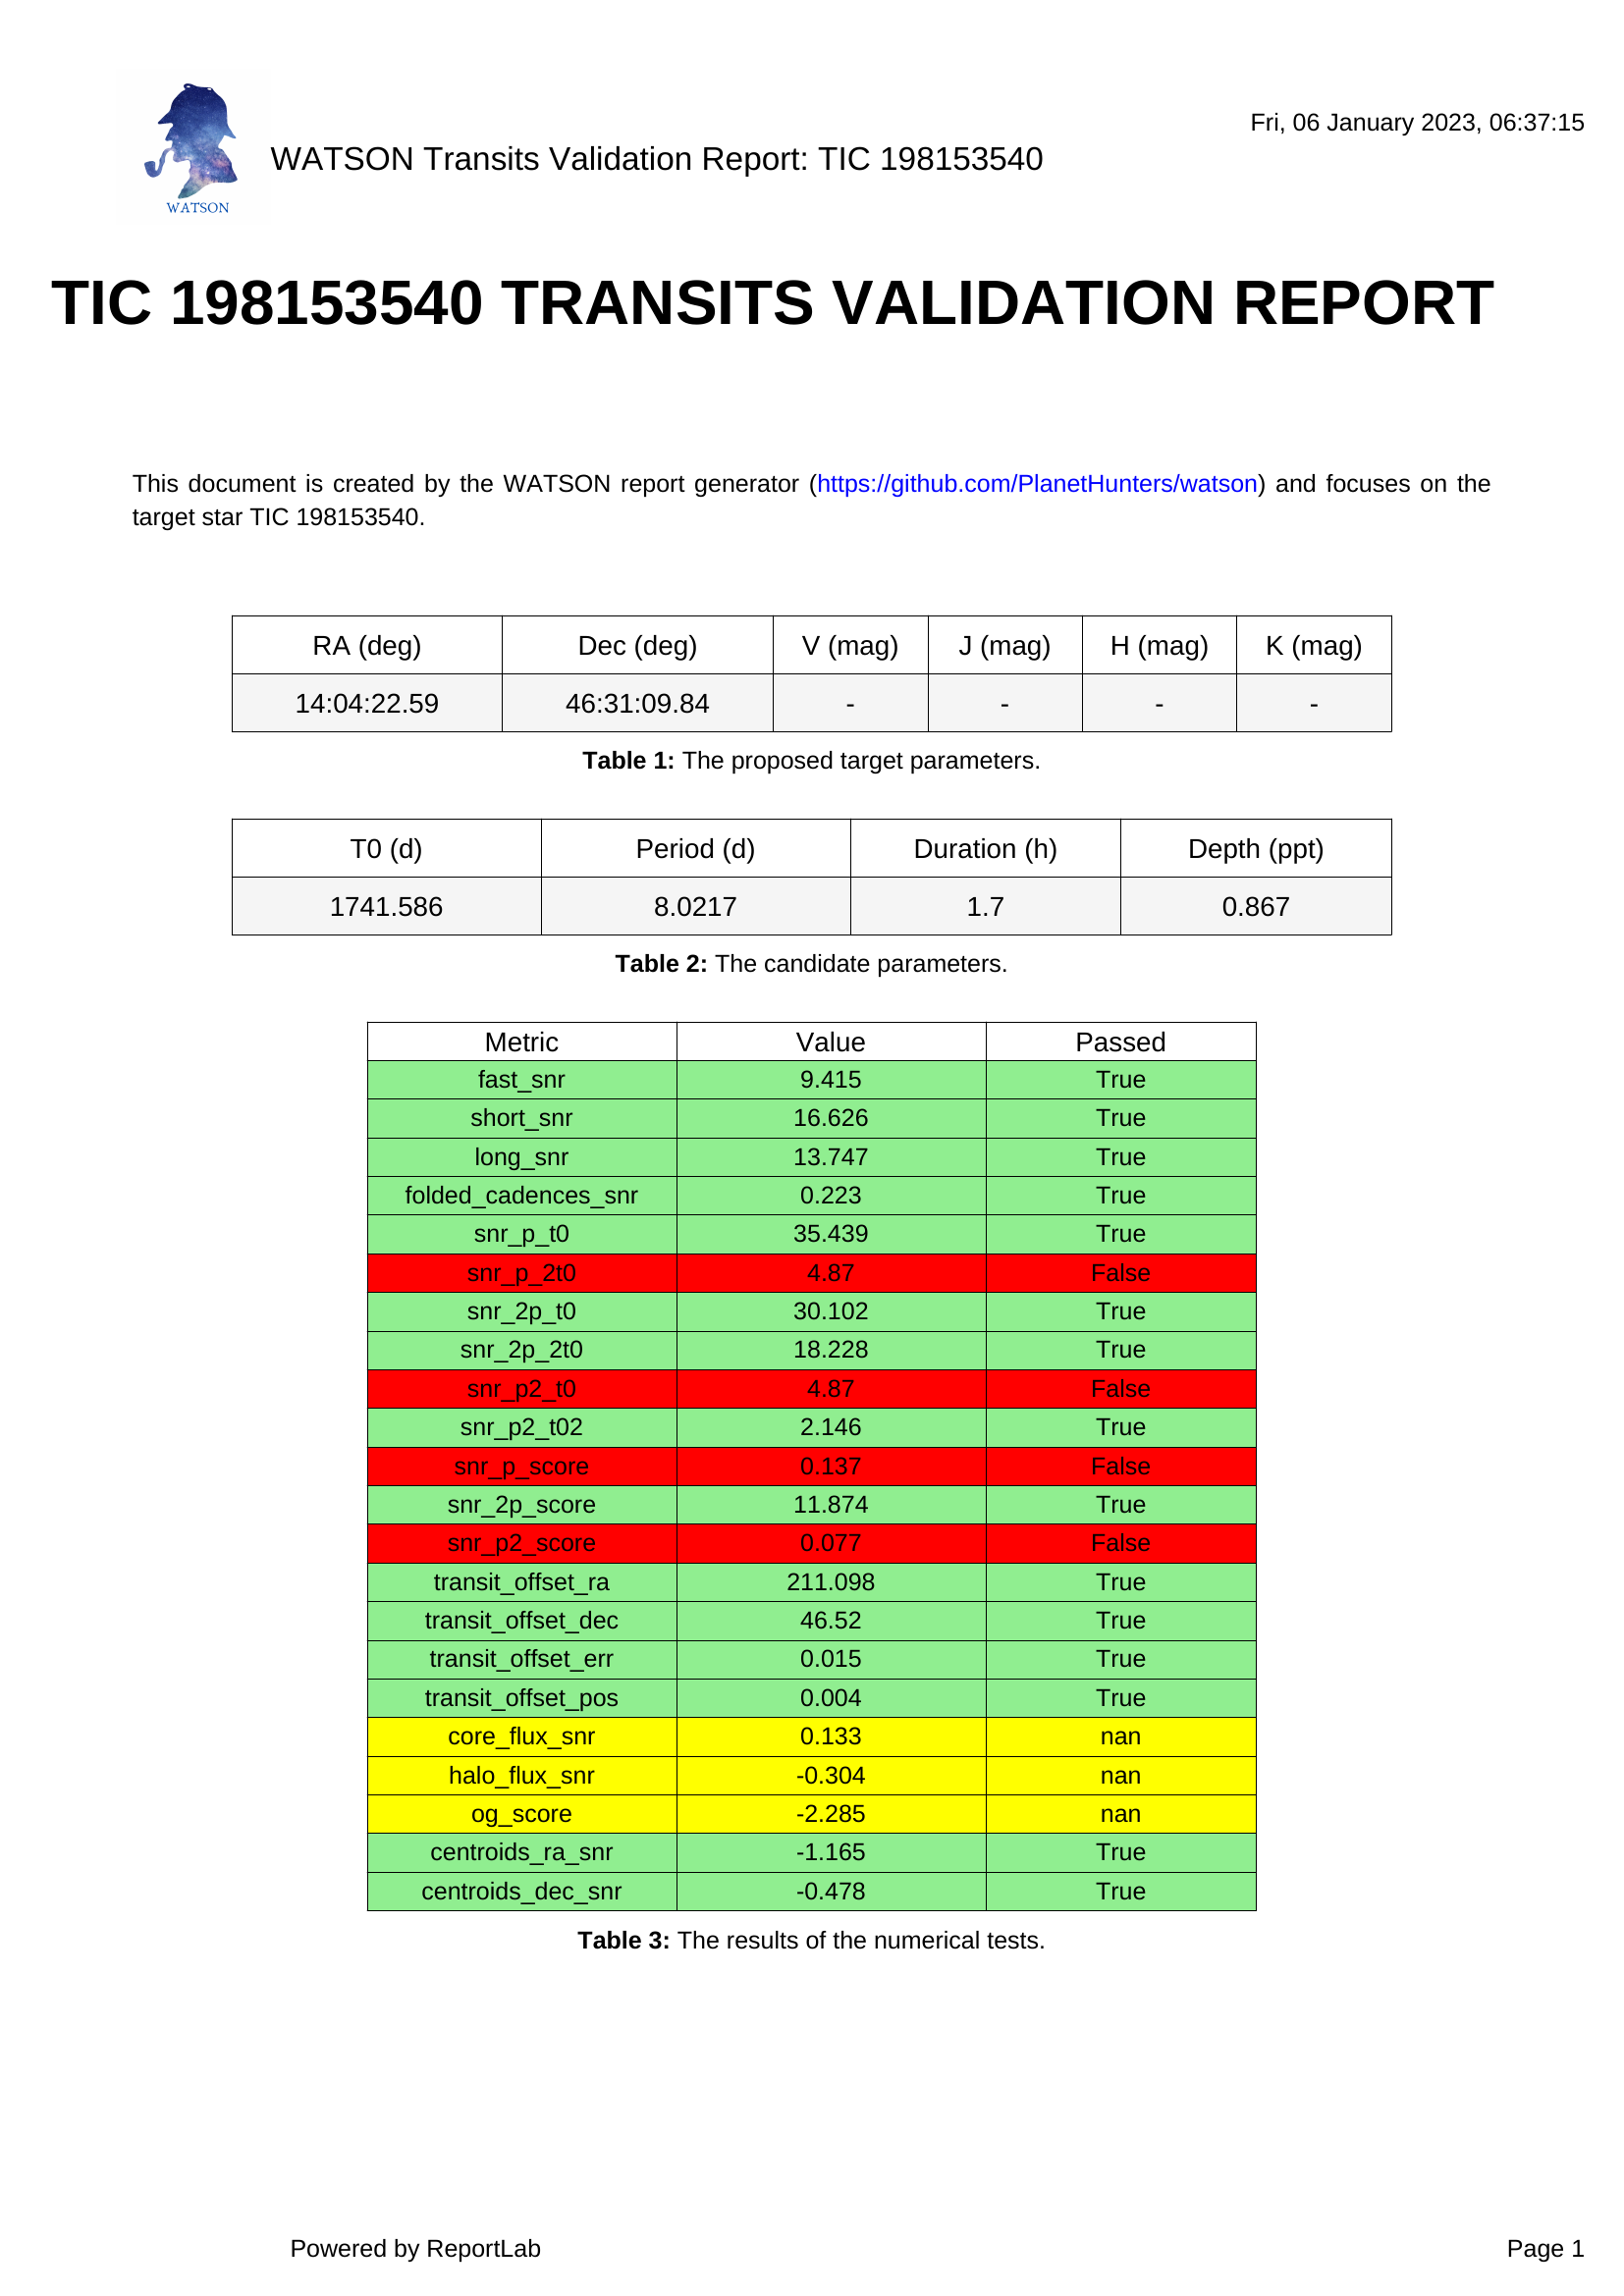

In [3]:
images[0]

It seems that the only problematic metrics are those related to the occultations (`snr_p_2t0` and `snr_p2_t0`) and hence `snr_p_score` and `snr_p2_score` also are red. 

We will go directly to page 3 to inspect Figure 3, which shows the plots for these metrics.

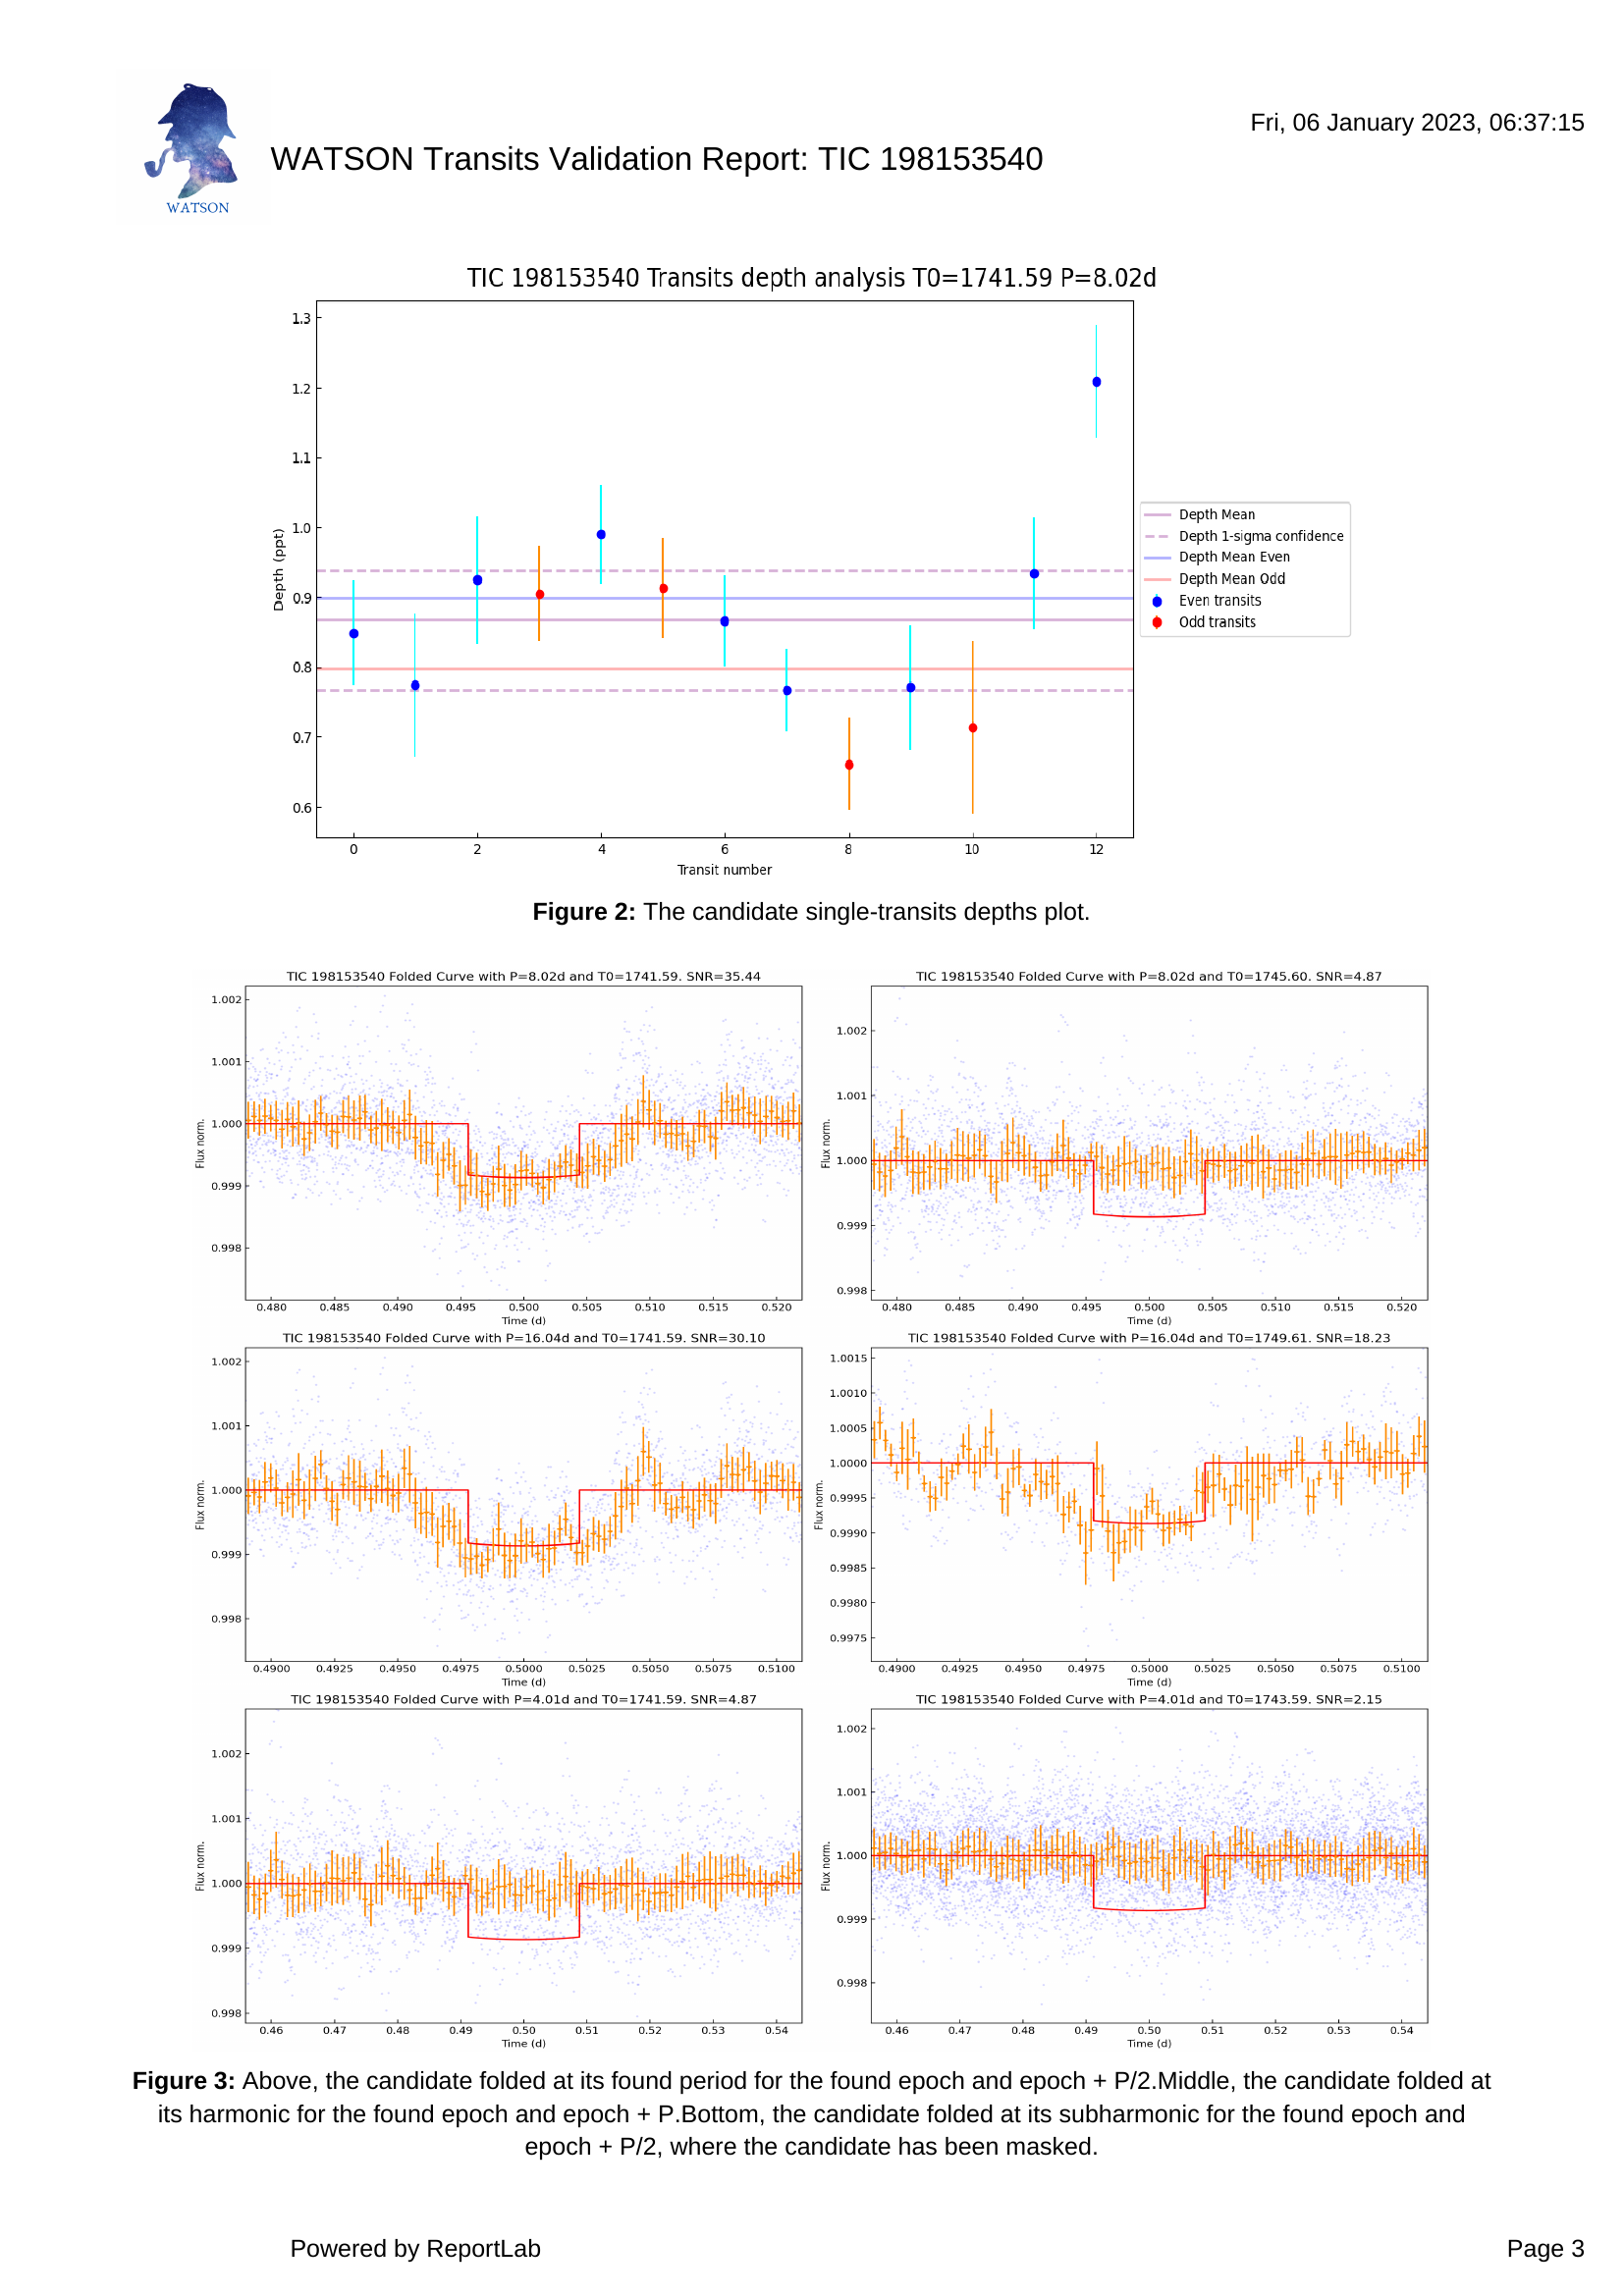

In [4]:
images[2]

Well, even though the SNR seemed to be greater than 3, there is no obvious transit shape in the top-right and bottom-left plots. Hence, we can refute the alert given by these metrics and continue with the analysis. The other metrics that were not green were those related to the optical ghost diagnostic: as they are yellow, that means that there was no precision enough to assess the quality based on these metrics, so we will just skip them.

After inspecting visually the problematic metrics, we can accept TOI 1798.01 as a good candidate. We could repeat the same exercise with TOI 1798.02, but we will go directly to the fourth signal (which has no official TOI assigned) in the next example.